<a href="https://colab.research.google.com/github/Jieun1124/ESAA/blob/main/CH6(1)_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## CH06. 차원 축소
### 01. 차원 축소(Dimension Reduction) 개요
---
차원축소는 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것이다. 일반적으로 차원이 증가할수록 데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소(sparse)한 구조를 가지게 된다. 수백 개 이상의 피처로 구성된 데이터 세트의 경우 상대적으로 적은 차원에서 학습된 모델보다 예측 신뢰도가 떨어진다. 또한 피처가 많을 경우 개별 피처 간에 상관관계가 높을 가능성이 크다. 선형 회귀와 같은 선형 모델에서는 입력 변수 간의 상관관계가 높을 경우 이로 인한 다중 공선성 문제로 모델의 예측 성능이 저하된다.    

이렇게 매우 많은 다차원의 피처를 차원 축소해 피처 수를 줄이면 더 직관적으로 데이터를 해석할 수 있다. 가령 수십 개 이상의 피처가 있는 데이터의 경우 이를 시각적으로 표현해 데이터의 특성을 파악하기는 불가능하다. 이 경우 3차원 이하의 차원 축소를 통해서 시각적으로 데이터를 압축해서 표현할 수 있다. 또한 차원 축소를 할 경우 학습 데이터의 크기가 줄어들어서 학습에 필요한 처리 능력도 줄일 수 있다.  
**차원 축소**
* **피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것이다. 기존 피처를 저차원의 중요 피처로 압축해서 추출하는 것이다.** 이렇게 새롭게 추출된 중요 특성은 기존의 피처가 압축된 것이므로 기존의 피처와는 완전히 다른 값이 된다. 
* **피처 추출(feature extraction): 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것이다.** 이런 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 의미한다.    

차원 축소는 단순히 데이터의 압축을 의미하는 것이 아니다. **더 중요한 의미는 차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출하는 데에 있다.** PCA, SVD, NMF는 이처럼 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘이다. 매우 많은 차원을 가지고 있는 이미지나 텍스트에서 차원 축소를 통해 잠재적인 의미를 찾아 주는데 이 알고리즘이 잘 활용되고 있다.     

이 차원 축소 알고리즘은 매우 많은 픽셀로 이뤄진 데이처에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축을 수행할 수 있다. 이렇게 변환된 이미지는 원본 이미지보다 훨씬 적은 차원이기 때문에 이미지 분류 등의 분류 수행 시에 과적합(overfitting) 영향력이 작아져서 오히려 원본 데이터로 에측하는 것보다 예측 성능을 더 끌어 올릴 수 있다. 이미지 자체가 가지고 있는 차원의 수가 너무 크기 때문에 비슷한 이미지라도 적은 픽셀의 차이가 잘못된 예측으로 이어질 수 있기 때문이다. 이 경우 함축적으로 차원을 축소하는 것이 예측 성능에 훨씬 도움이 된다.     

차원 축소 알고리즘이 자주 사용되는 또 다른 영역은 텍스트 문서의 숨겨진 의미를 추출하는 것이다. 문서는 많은 단어로 구성돼 있다. 차원 축소 알고리즘은 문서 내 단어들의 구성에서 숨겨져 있는 시맨틴(Semantic) 의미나 토픽(Topic)을 잠재 요소로 간주하고 이를 찾아낼 수 있다. SVD 와 NMF는 이러한 시맨틱 토픽(Semantic Topic) 모델링을 위한 기반 알고리즘으로 사용한다.       


### 02. PCA(Prinicipal Component Analysis)
---
#### 1) PCA 개요
* PCA(Prinicpal Component Analysis): 가장 대표적인 차원 축소 기법. 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Prinicipal Component)을 추출해 차원을 축소하는 기법이다. PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주한다.)      

**PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)를 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 합니다. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식으로 축을 생성한다. 이렇게 생성된 벡터 축에 원본 데이터를 투영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소된다.**    

PCA, 즉 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.     

PCA를 선형대수 관점에서 해석해 보면, 입력 데이터의 공분산 행렬(Covariance Matrix)을 고유값 분해하고, 이렇게 구한 고유벡터에 입력 데이터를 선형 변환하는 것이다. 이 고유벡터가 PCA의 주성분 벡터로서 입력 데이터의 분산이 큰 방향을 나타낸다. 고윳값(eigenvalue)은 바로 이 고유벡터의 크기를 나타내며, 동시에 입력 데이터의 분산을 나타낸다. **즉 PCA는 입력 데이터의 공분산 행렬이 고유벡터와 고유값으로 분해될 수 있으며, 이렇게 분해된 고유벡터를 이용해 입력 데이터를 선형 변환하는 방식이다.**

* **PCA의 STEP**
  1. 입력 데이터 세트의 공분산 행렬을 생성한다. 
  2. 공분산 행렬의 고유벡터와 고유값을 계산한다.
  3. 고유값이 가장 큰 순으로 K개(PCA 변환 차수만큼)만큼 고유벡터를 추출한다.
  4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환한다.
  
  
PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축한 것이다. 

* 붓꽃(Iris) 데이터 세트는 sepal length, sepal width, petal length, petal width의 4개의 속성으로 되어 있는데, 이 4개의 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인해보자.

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


* sepal length와 sepal width를 X축, Y축으로 해 품종 데이터 분포 나타내기

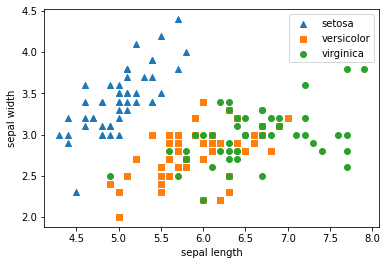

In [ ]:
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot 
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에만 일정하게 분포돼있다. versicolor와 virginica의 경우 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건이다. 

* PCA로 4개 속성을 2개로 압축한 뒤 앞의 예제와 비슷하게 2개의 PCA 속성으로 붓꽃 데이터의 품종 분포를 2차원으로 시각화하기      
먼저 붓꽃 데이터 세트에 바로 PCA를 적용하기 전에 개별 속성을 함께 스케일링해야한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 따라서 여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환해야한다. 사이킷런의 StandardScaler를 이용해 평균이 0, 분산이 1인 표준 정규 분포로 iris 데이터 세트의 속성값들을 변환한다. 

**평균이 0, 분산이 1인 정규 분포로 원본 데이터를 변환**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용해 표준 정규 분포를 가지는 값들로 변환 
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:,:-1])

이제 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA 속성) PCA 데이터로 변환해보자. 사이킷런은 PCA 변환을 위해 PCA 클래스를 제공한다.
* PCA 클래스는 생성 파라미터로 n_components를 입력바는다. n_components는 PCA로 변환할 차원의 수를 의미하므로 여기서는 2로 설정한다. 이후에 fit과 transform을 호출해 PCA 변환을 수행한다.

**PCA 변환 수행**

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


원본 데이터 세트를 (150, 2)의 데이터 세트로 iris_pca 객체 변수로 반환했다. iris_pca는 변환된 PCA 데이터 세트를 150X2 넘파이 행렬로 가지고 있다. 이를 DF로 변환한 뒤 데이터 값을 확인해보기.

In [ ]:
# PCA 변환된 데이터 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns = ['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns = pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


이제 2개의 속성으로 PCA 변환된 데이터 세트를 2차원 상에서 시각화해본다. pca_component_1 속성을 X축으로, pca_component_2 속성을 Y축으로 해서 붓꽃 품종이 어떻게 분포되는지 확인한다.

**PCA로 차원 축소된 피처들로 데이터 산포도 시각화**

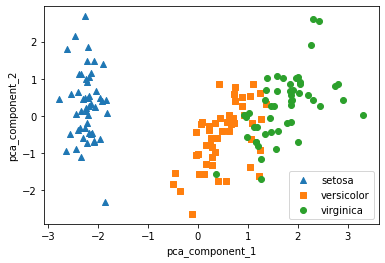

In [ ]:
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행. 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

PCA로 변환한 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분이 가능하다. versicolor와 virginica는 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만, 비교적 잘 구분됐다. 이는 PCA의 첫 번째 새로운 축인 pca_component_1이 원본 데이터의 변동성을 잘 반영했기 때문이다. 
* PCA Component 별로 원본 데이터의 변동성을 얼마나 반영하고 있는지 알아보겠다.    
PCA 변환을 수행한 PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공하고 있다.

**각 PCA Component별 변동성 비율**

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


첫번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지하며, 두번째인 pca_component_2가 약 22.8%를 차지한다. 따라서 PCA를 2개 요소로만 변환해도 원본 데이터의 변동성을 95%를 설명할 수 있다.

* 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과를 비교하기      
Estimator는 RandomForestClassifier를 이용하고 cross_val_score()로 3개의 교차 검증 세트로 정확도 결과를 비교한다. 먼저 원본 붓꽃 데이터에 랜덤 포레스트를 적용한 결과는 다음과 같다.         


**원본 데이터와 PCA 변환된 데이터 기반에서 예측 성능 비교**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


기존 4차원 데이터를 2차원 PCA로 변환한 데이터 세트에 랜덤 포레스트를 적용해보기

In [ ]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도:', scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능이 떨어질 수밖에 없다. 10%의 정확도 하락은 비교적 큰 성능 수치의 감소지만, 4개의 속성이 2개로, 속성 개수가 50%로 감소한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당 부분 유지하고 있음을 알 수 있다.

다음으로, 좀 더 많은 피처를 가진 데이터 세트를 적은 PCA 컴포넌트 기반으로 변환한 뒤, 예측 영향도가 어떻게 되는지 변환된 PCA 데이터 세트에 기반해서 비교해보겠다. 

* 신용카드 고객 데이터 세트 

In [ ]:
df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


'default paymetn next month'는 Target 값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0이다. 원본 데이터 세트에 PAY_0 다음에 PAY_2 칼럼이 있으므로 PAY_0 칼럼을 PAY_1으로 칼럼명을 변환하고 'default ~' 칼럼도 칼럼명이 너무 길어서 'default'로 칼럼명을 변경한다. 이후 Target 속성인 'default' 칼럼을 y_target 변수로 별도로 저장하고 피처 데이터는 이 default 칼럼을 제외한 별도의 DataFrame으로 만든다.

In [ ]:
df.rename(columns={'PAY_0':'PAY_1', 'default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

23개의 속성 데이터 세트가 있다. 각 속성끼리 상관도가 매우 높기 때문에 DF의 corr()을 이용해 각 속성 간의 상관도를 구한 뒤 시각화하기

<AxesSubplot:>

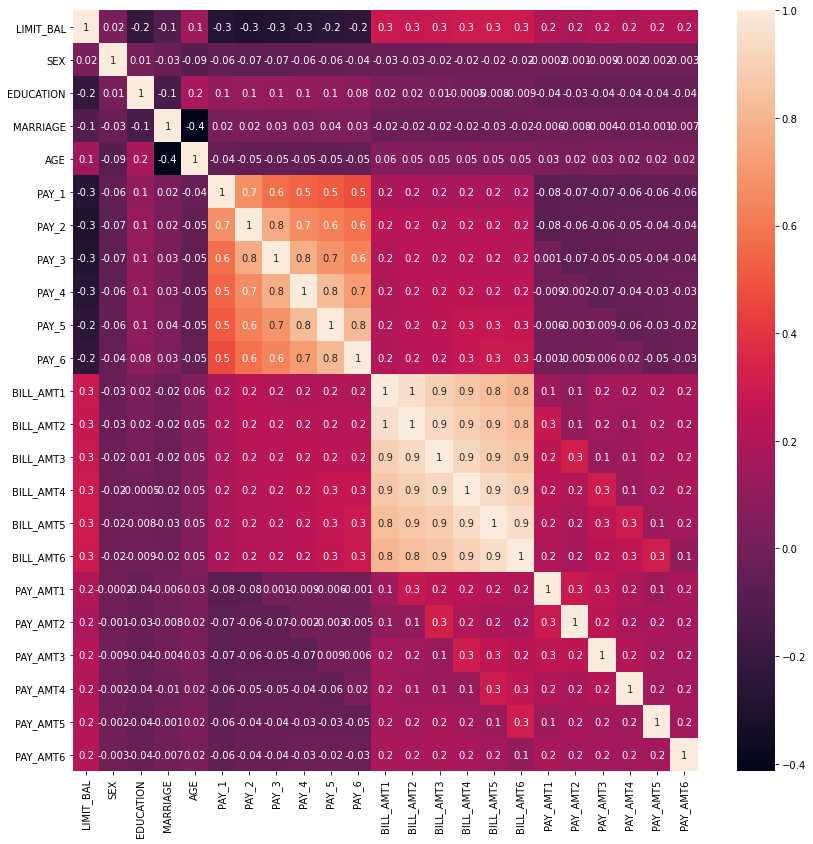

In [ ]:
import seaborn as sns

corr = X_features.corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, annot=True, fmt='.1g')

BILL_AMT1 ~ BILL_AMT6 6개 속성끼리의 상관도가 대부분 0.9 이상으로 매우 높다. 이렇게 높은 상관도를 가진 속성들은 소수의 PCA 만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다. 이 BILL_AMT1 ~ BILL_AMT6까지 6개 속성을 2개의 컴포넌트로 PCA 변환한 뒤 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아보겠다.

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL~AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit() 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명할 수 있으며 특히 첫번째 PCA 축으로 90%으 변동성을 수용할 정도로 이 6개 속성의 상관도가 매우 높다

이번에는 원본 데이터 세트와 6개의 컴포넌트로 PCA 변환한 데이터 세트의 분류 예측 결과를 상호 비교해보겠다. 
* 원본 데이터 세트에 랜덤 포레스트를 이용해 타겟 값이 디폴트 값을 3개의 교차 검증 세트로 분류 예측해보기. 

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1, 7)]
print('대상 속성명:', cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산을 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])

pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]
